### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: CHINA, GERMANY, ITALY, SOUTH KOREA, JAPAN, USA, AUSTRALIA

In [1]:
from covid_top import *
%matplotlib inline

Start importing World-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(data)

393

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'02-17-2021'

In [4]:
print("Total recovered first day: ", totalrecovered_by_day[0])
print("Total recovered last day: ", totalrecovered_by_day[-1])

Total recovered first day:  30.0
Total recovered last day:  73707506.0


### New Recovered in the World changed by day

('Last day Increasing', 351334.0)

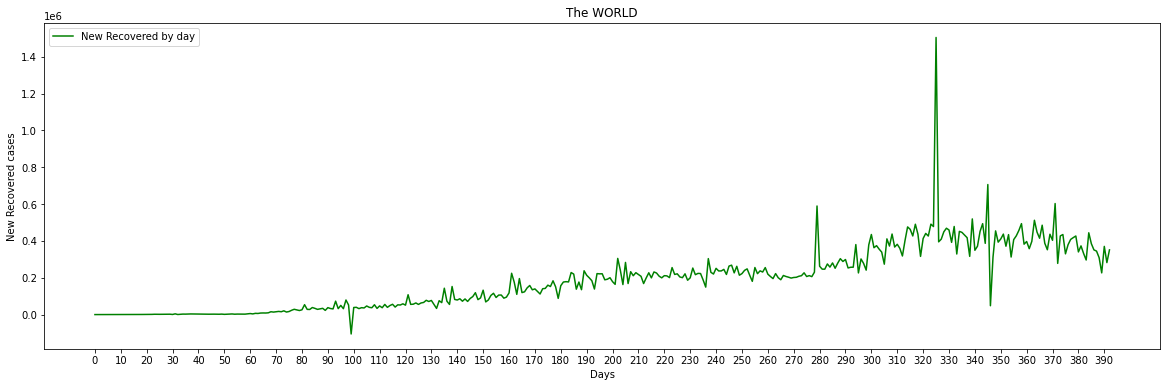

In [5]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("The WORLD")
plt.legend(loc='upper left')

('Last day Increasing', totalrecovered_by_day[-1]-totalrecovered_by_day[-2])

##### NOTE: THERE IS DATA BIAS AT DAY 98

### Number of RECOVERED in the World from day 0 to latest day

Ratio recovered over Confirmed in last day (%):  67.066
Highest Ratio until now (%):  69.766


('Total Recovered until now: ', 73707506.0)

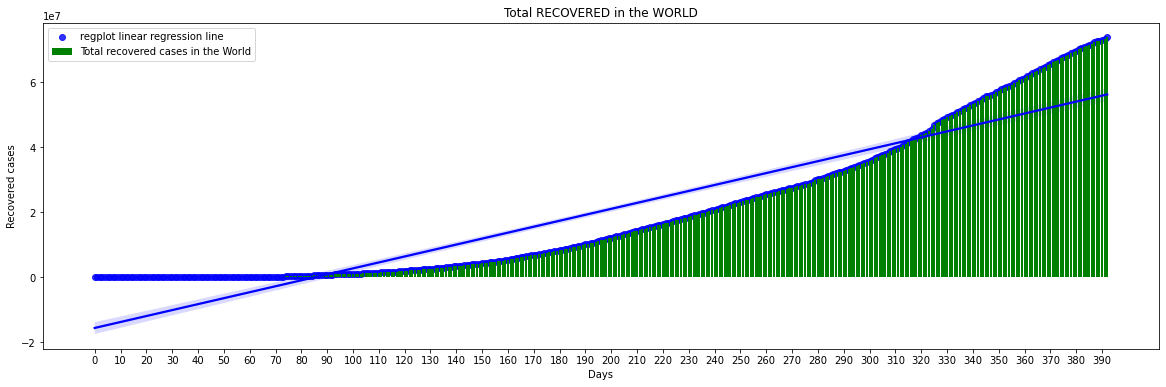

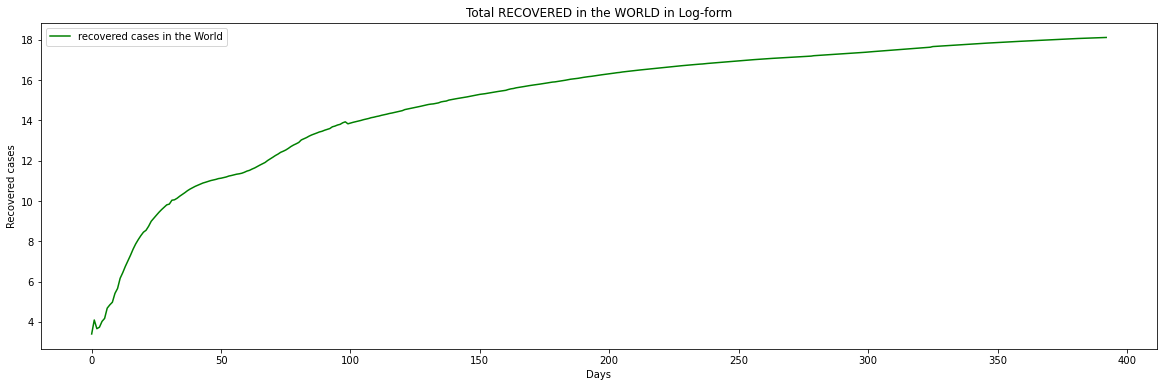

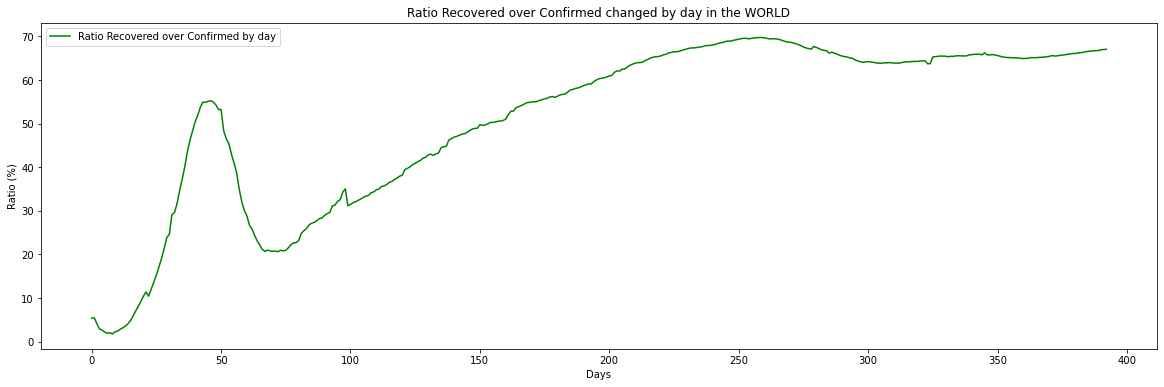

In [6]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Total recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
ax = sns.regplot(x=x_dat, y=totalrecovered_by_day, ci=95, label="regplot linear regression line", color="blue")
ax.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD")

plt.figure(2)
plt.plot(x_dat, np.log(totalrecovered_by_day), color='green', label='recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD in Log-form")

plt.figure(3)
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.title("Ratio Recovered over Confirmed changed by day in the WORLD")
plt.legend(loc='upper left')

print("Ratio recovered over Confirmed in last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))
('Total Recovered until now: ', totalrecovered_by_day[-1])

,China,Germany,Italy,"Korea, South",Japan,US,Australia,Luxembourg,United Kingdom,Canada,Vietnam
0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
388,94641.0,2128002.0,2216050.0,73559.0,380413.0,11611040.0,26120.0,49301.0,10850.0,769007.0,1529.0
389,94728.0,2136933.0,2225519.0,73794.0,382730.0,11642098.0,26126.0,49301.0,10914.0,771956.0,1532.0
390,94796.0,2148269.0,2237290.0,74551.0,384941.0,11723779.0,26128.0,49775.0,10959.0,774703.0,1541.0
391,94875.0,2161100.0,2251734.0,75360.0,387584.0,11770637.0,26133.0,49807.0,11022.0,782150.0,1573.0


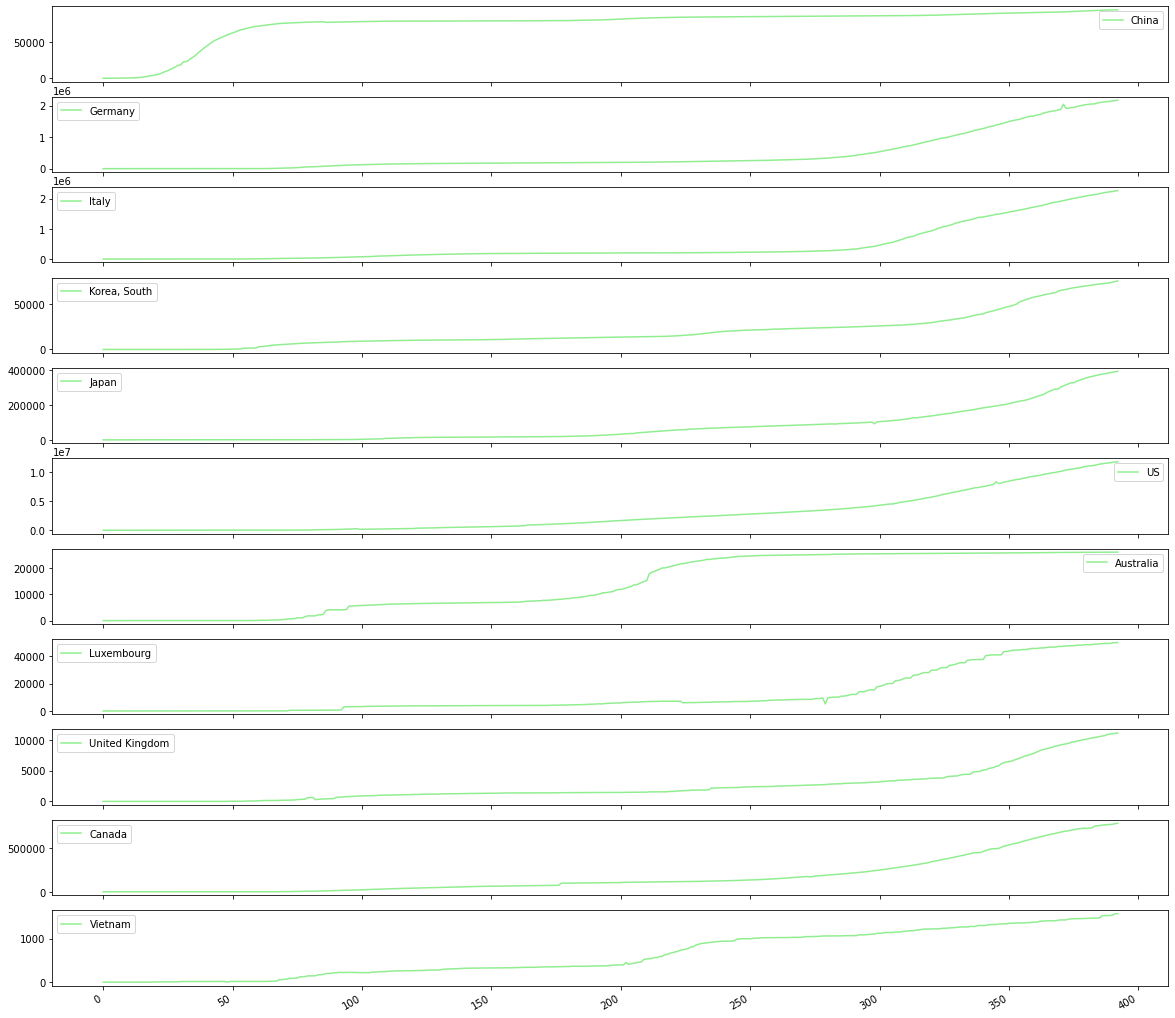

In [7]:
from pandas import Grouper
countries = ['China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam']
rcParams['figure.figsize'] = 20, 20
countries_recovered[countries].plot(subplots=True, legend=True, color='lightgreen')
countries_recovered[countries]

,China,Germany,Italy,"Korea, South",Japan,US,Australia,Luxembourg,United Kingdom,Canada,Vietnam
Last day Increasing,85.0,11212.0,16519.0,536.0,3468.0,57393.0,1.0,187.0,77.0,3358.0,1.0
Total Recovered,94960.0,2172312.0,2268253.0,75896.0,391052.0,11828030.0,26134.0,49994.0,11099.0,785508.0,1574.0
Highest Number,3994.0,161840.0,39266.0,2143.0,10998.0,425878.0,2605.0,4523.0,350.0,23848.0,59.0


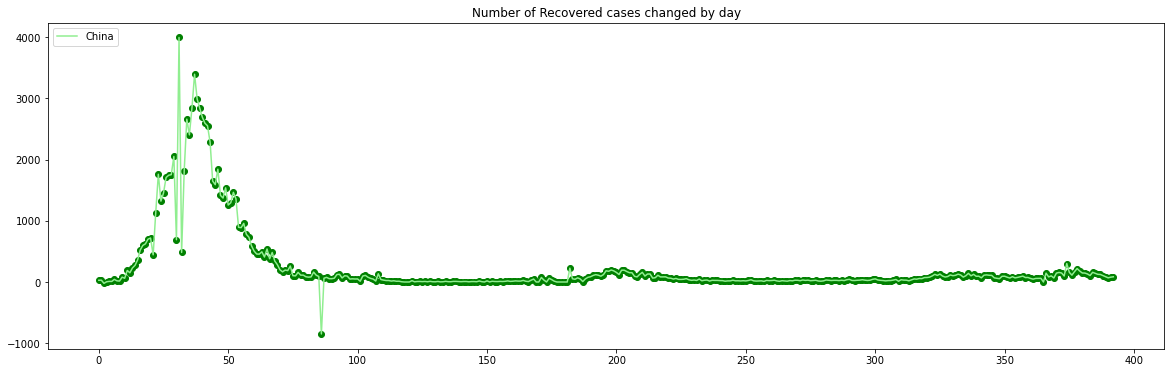

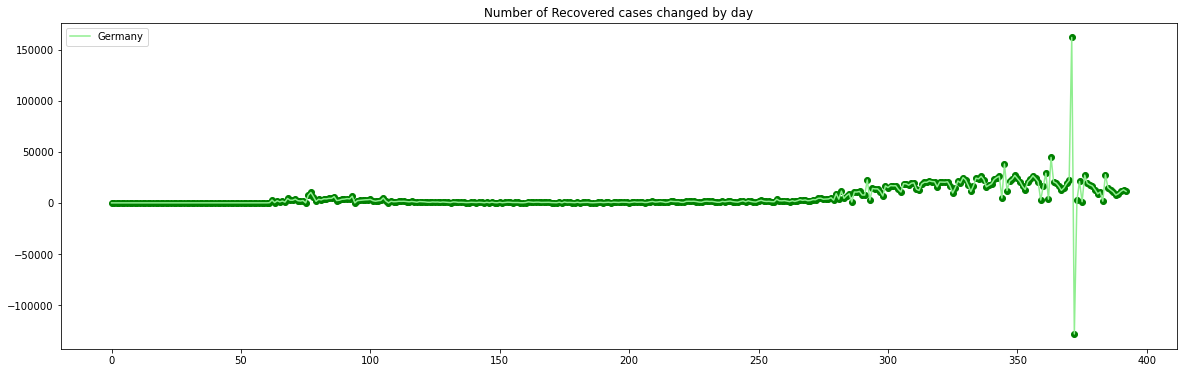

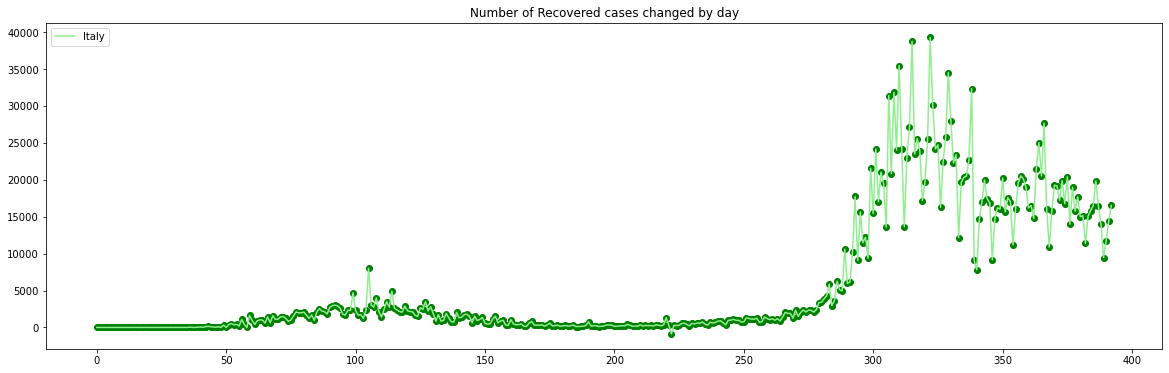

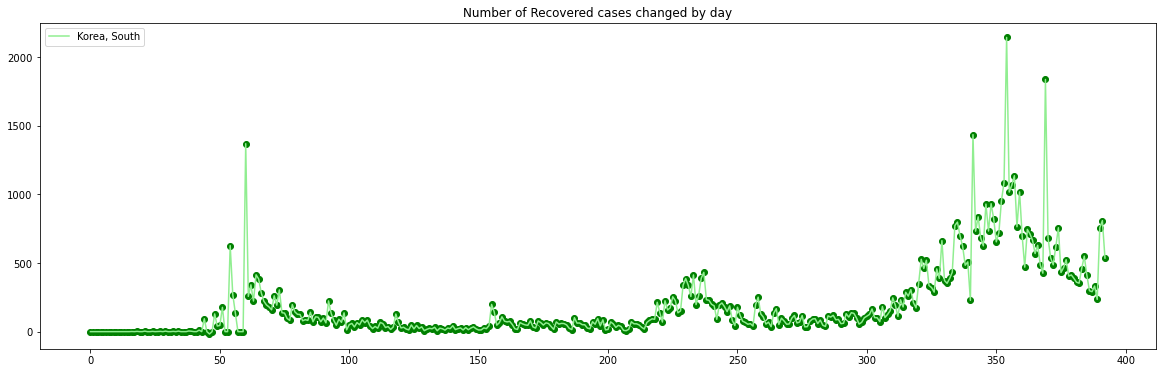

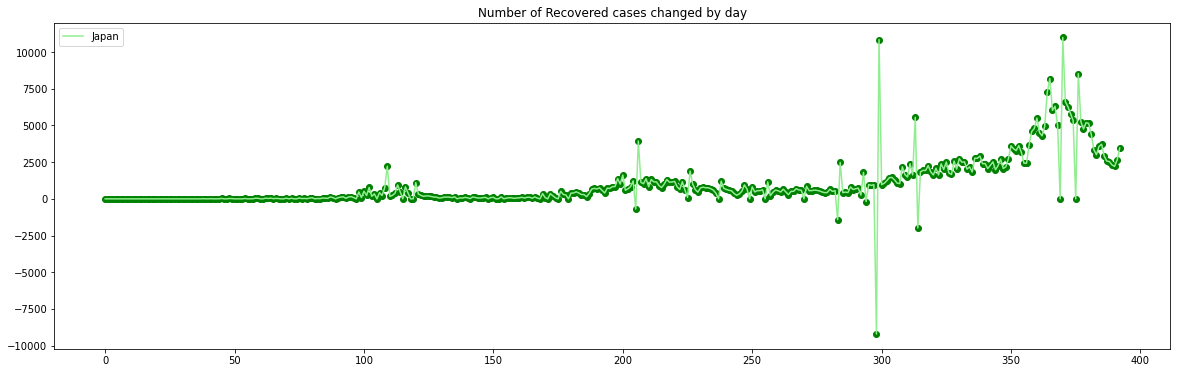

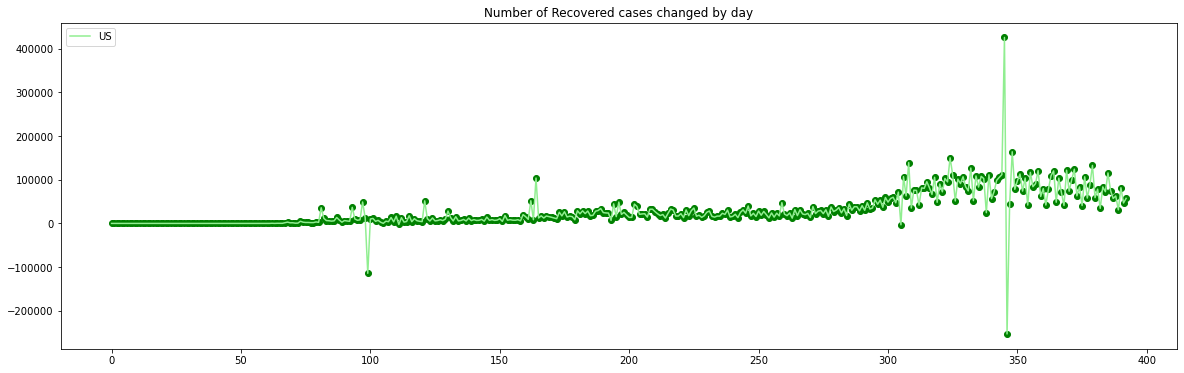

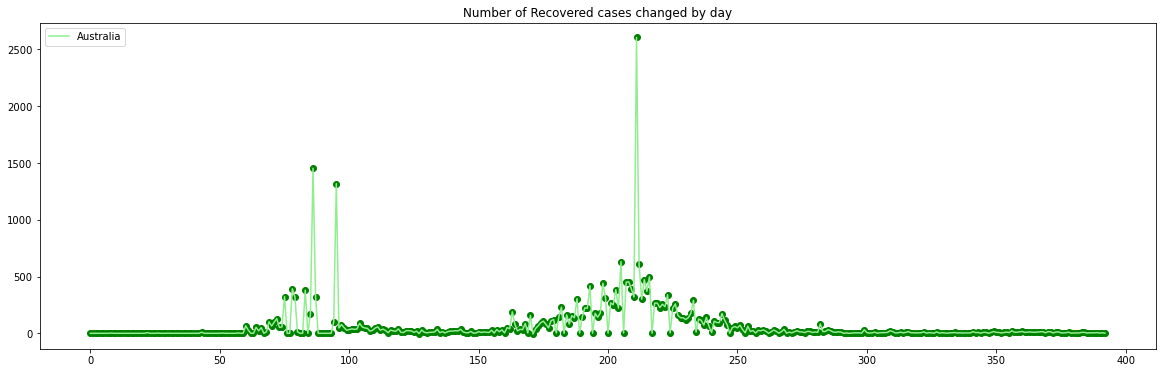

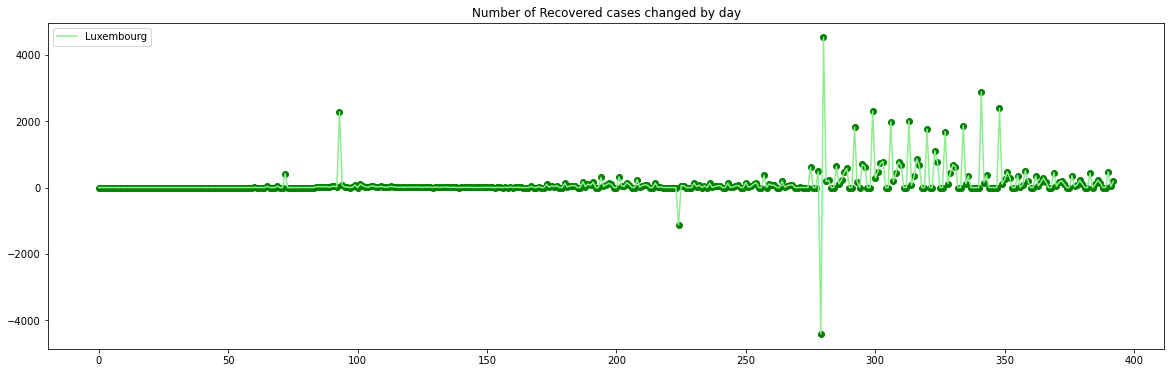

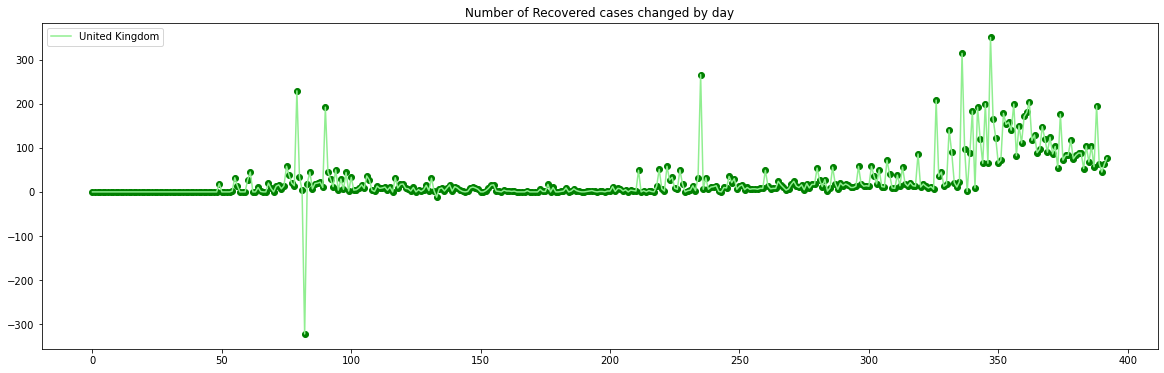

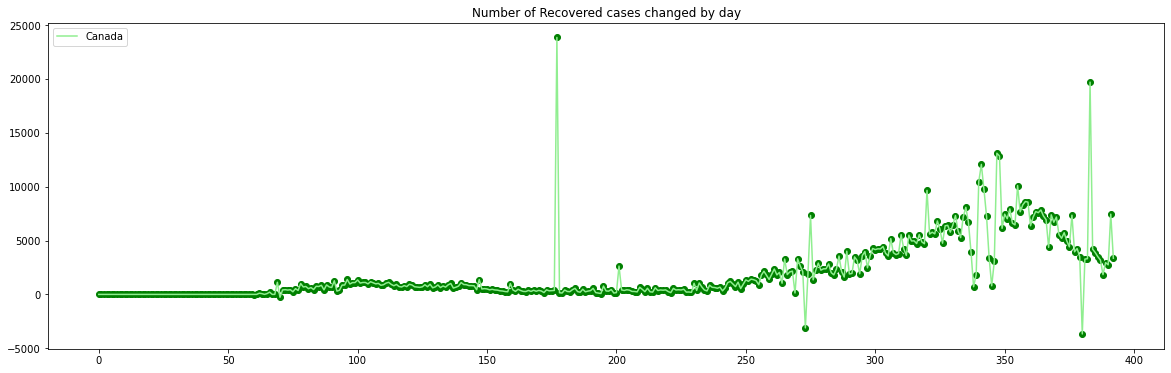

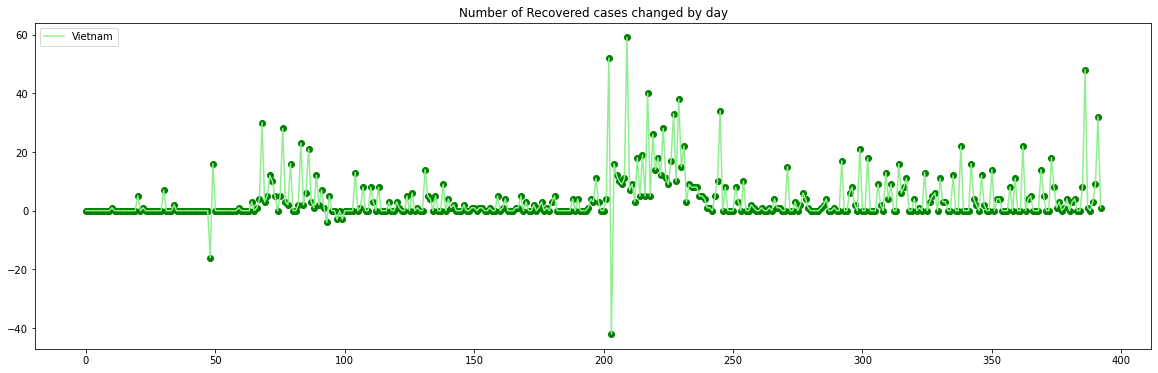

In [8]:
countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Recovered', 'Highest Number'])

for country in countries:
    countriesdf[country] = [all_countries['Recovered'][country][-1]-all_countries['Recovered'][country][-2], all_countries['Recovered'][country][-1], np.max(list(list(zip(*y_dat_recovered_ByDay[country]))[1]))]

figure = 1
rcParams['figure.figsize'] = 20, 6

for country in countries:    
    plt.figure(figure)
    plt.plot(*zip(*y_dat_recovered_ByDay[country]), color='lightgreen', label=country)
    plt.scatter(*zip(*y_dat_recovered_ByDay[country]), color='green')
    plt.title("Number of Recovered cases changed by day")
    plt.legend(loc='upper left')
    figure = figure+1

countriesdf

#### There are bias data found when you see the scattered plot shows the negative values (<0).